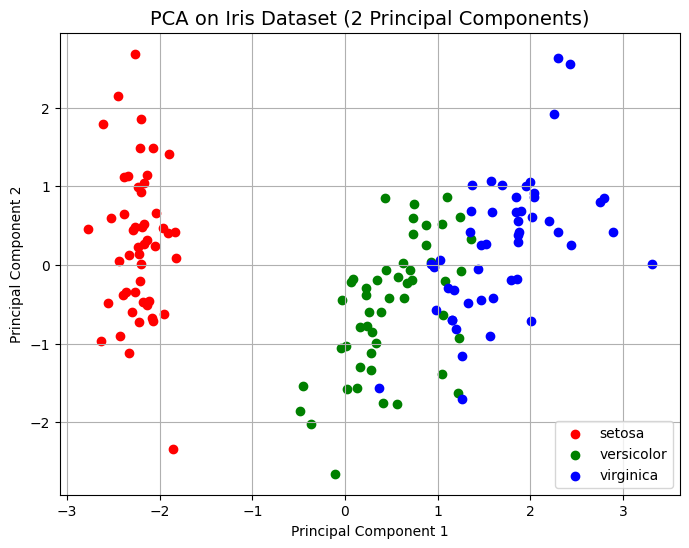

Explained Variance Ratio of each component:
[0.72962445 0.22850762]

Total Variance Captured by 2 Components: 0.958


In [ ]:
# ---------------------------------------------------------
# Assignment 6: Principal Component Analysis (PCA)
# ---------------------------------------------------------

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# ---------------------------------------------------------
# Step 1: Load the Iris dataset
# ---------------------------------------------------------
iris = load_iris()
X = iris.data          # Feature matrix (sepal length, sepal width, petal length, petal width)
y = iris.target        # Target labels (0, 1, 2)
target_names = iris.target_names

# ---------------------------------------------------------
# Step 2: Standardize the features
# ---------------------------------------------------------
# PCA is affected by scale, so we need to standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------------------------------------------------------
# Step 3: Apply PCA (reduce dimensions to 2 principal components)
# ---------------------------------------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# ---------------------------------------------------------
# Step 4: Create a DataFrame for visualization
# ---------------------------------------------------------
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Target'] = y

# ---------------------------------------------------------
# Step 5: Visualize the transformed dataset
# ---------------------------------------------------------
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']

for i, target in enumerate(np.unique(y)):
    plt.scatter(
        pca_df[pca_df['Target'] == target]['PC1'],
        pca_df[pca_df['Target'] == target]['PC2'],
        color=colors[i],
        label=target_names[target]
    )

plt.title("PCA on Iris Dataset (2 Principal Components)", fontsize=14)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()

# ---------------------------------------------------------
# Step 6: Display explained variance ratio
# ---------------------------------------------------------
print("Explained Variance Ratio of each component:")
print(pca.explained_variance_ratio_)
print(f"\nTotal Variance Captured by 2 Components: {sum(pca.explained_variance_ratio_):.3f}")
